<H2>Content </H2>


<ol>
    <B>
<li>INTRODUCTION</li>
<li>DATA EXPLORATION</li>
<li>EXPLORATORY DATA ANALYSIS</li>
<li>MODELLING</li>
<li>MODEL SELECTION AND ESEMBLE </li>
<li>        PREDICTION </li>
<li>SUMMARY</li>
        </B>
</ol>

<h2> 1. INTRODUCTION </h2>

Chek the Read me for a brief intro.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('bmh')

from scipy                      import stats
from sklearn.model_selection    import train_test_split
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.metrics            import mean_squared_error
from sklearn.preprocessing      import StandardScaler
from sklearn.cluster            import KMeans
from sklearn.model_selection    import KFold, StratifiedKFold
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import train_test_split
from sklearn.model_selection    import RandomizedSearchCV
from sklearn.model_selection    import GridSearchCV
from sklearn.preprocessing      import LabelEncoder
from sklearn.linear_model       import LinearRegression
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import GradientBoostingRegressor
from xgboost                    import XGBRegressor
import xgboost as xgb
from sklearn.metrics            import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

<h3>Import the Dataset</h3>
<h4>The dataset consist of two data </h4>

In [2]:
#READ THE DATA 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


<h2> 2. DATA EXPLORATION </h2>
Taking a closer look on the test data, train data before combining the data.

In [3]:
#Visualize the shape of the test, train and combined data
'train',train.shape,train.nunique(),'test',test.shape, test.nunique()

('train',
 (550068, 12),
 User_ID                        5891
 Product_ID                     3631
 Gender                            2
 Age                               7
 Occupation                       21
 City_Category                     3
 Stay_In_Current_City_Years        5
 Marital_Status                    2
 Product_Category_1               20
 Product_Category_2               17
 Product_Category_3               15
 Purchase                      18105
 dtype: int64,
 'test',
 (233599, 11),
 User_ID                       5891
 Product_ID                    3491
 Gender                           2
 Age                              7
 Occupation                      21
 City_Category                    3
 Stay_In_Current_City_Years       5
 Marital_Status                   2
 Product_Category_1              18
 Product_Category_2              17
 Product_Category_3              15
 dtype: int64)

* From of the  observation above 
    * the Train data is more than twice the test data.
    * The Users are same in the train and test 
    * Products sold in test are 130 fewer than the products in train.
    * the product category in train is 2 less in product category1, but the same in others. 
    
From this information a strategy for feature engineering and cleaning is performed. 

It will be better to combine the train and test data so we don't need to repeat the process twice. we will make a new column (kind) and we will fill it with train & test to separate the data when we finish

<h4>Dependent Variable</h4>
<ol>
<li>Gender----------------------male or female</li>
<li>Age------------------------ age category the customer belongs to</li>
<li>Occupation----------------- Occupation of the customer</li>
<li>City_Category---------------city category the customer resides in</li>
<li>Stay_In_Current_City_Years--no. of years the customer has resided in the current city</li>
<li>Marital_Status------------- married or unmarried</li>
<li>Product_Category_1--------- products of category 1</li>
<li>Product_Category_2--------- products of category 2</li>
<li>Product_Category_3--------- products of category 3</li>
</ol>

<h4>Target Variable</h4>
Purchase- the purchase ammount in dollars
<h4>Others</h4>
<ol>
<li>User_ID---------------- unique id of the user</li>
<li>Product_ID------------- unique id of the product</li>
    Kind ------------------ As mentiond above (Train or Test)
</ol>

In [4]:
train.drop_duplicates(keep = False, inplace = True)
train.shape

(550068, 12)

In [5]:
#Create a new column on the test and train data
#combine the test and train using pandas to cocatinate on the column
train['kind'] = 'train'
test['kind'] = 'test'
combine = pd.concat([train,test], axis=0)

#view the head of the data set
print(combine.shape)
combine.columns

(783667, 13)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'kind'],
      dtype='object')

<h4>Explore the dataset to see the </h4>

In [6]:
combine.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,kind
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train


In [7]:
combine.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,kind
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train


In [8]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  kind                        783667 non-null  object 
dtypes: float64(3),

In [9]:
combine.dtypes[combine.dtypes == 'int64']

User_ID               int64
Occupation            int64
Marital_Status        int64
Product_Category_1    int64
dtype: object

In [10]:
combine.dtypes[combine.dtypes == 'object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
kind                          object
dtype: object

#### Summary
* The Gender should be changed to categorical
* The City category should also be changed to categorical
* Stay in current city years should be treated.
* The Age category will be stated clearly
* Product category is a categorical variable (Missing data should be treated)
* Purchase can be used to determine the price of the goods 

In [11]:
combine['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

<h5>change the required columns of categorical  </h5>

In [12]:
combine['Gender'] = combine['Gender'].astype('category')
combine['City_Category'] = combine['City_Category'].astype('category')
combine['Stay_In_Current_City_Years'] = combine['Stay_In_Current_City_Years'].astype('category')
#combine['Product_Category_1'] = combine['Product_Category_1'].astype('category')
#combine['Product_Category_2'] = combine['Product_Category_2'].astype('category')
#combine['Product_Category_3'] = combine['Product_Category_3'].astype('category')
combine['Age'] = combine['Age'].astype('category')
combine['City_Category'] = combine['City_Category'].astype('category')
combine['Occupation'] = combine['Occupation'].astype('category')
combine['Marital_Status'] = combine['Marital_Status'].astype('category')

In [13]:
combine.dtypes[combine.dtypes == 'category']

Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
dtype: object

In [14]:
#Find out the number of unique products
combine.loc[(combine['kind']=='train')].Product_ID.nunique(), combine.loc[(combine['kind']=='test')].Product_ID.nunique()

(3631, 3491)

In [15]:
#Find out the number of unique users
combine.loc[(combine['kind']=='train')].User_ID.nunique(),combine.loc[(combine['kind']=='test')].User_ID.nunique()

(5891, 5891)

In [16]:
combine['User_ID'].value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1005117      13
1004991      13
1000708      13
1005804      13
1000341      13
Name: User_ID, Length: 5891, dtype: int64

In [17]:
#here we describe the new data set to view all stastical measures
combine.describe()

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,18.000000,18.000000,23961.000000


From the above data the Purchase needs to be observed carefull. 


<h5>Then we want to find out the number of missing values in the data set </h5>

In [18]:
#identify null values
combine.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
kind                               0
dtype: int64

In [19]:
#Convert product category to binary 
combine['Product_Category_2'] = combine['Product_Category_2'].fillna(value = 0)
combine['Product_Category_3'] = combine['Product_Category_3'].fillna(value = 0)

<h5>Visualizing the dataset with missing value library "Missingno"  </h5>
With the aid of this library. the whole data set caan be viewed in a holistic manner. Viewing all the basic data variables, showing misisng and enpty variable set. 

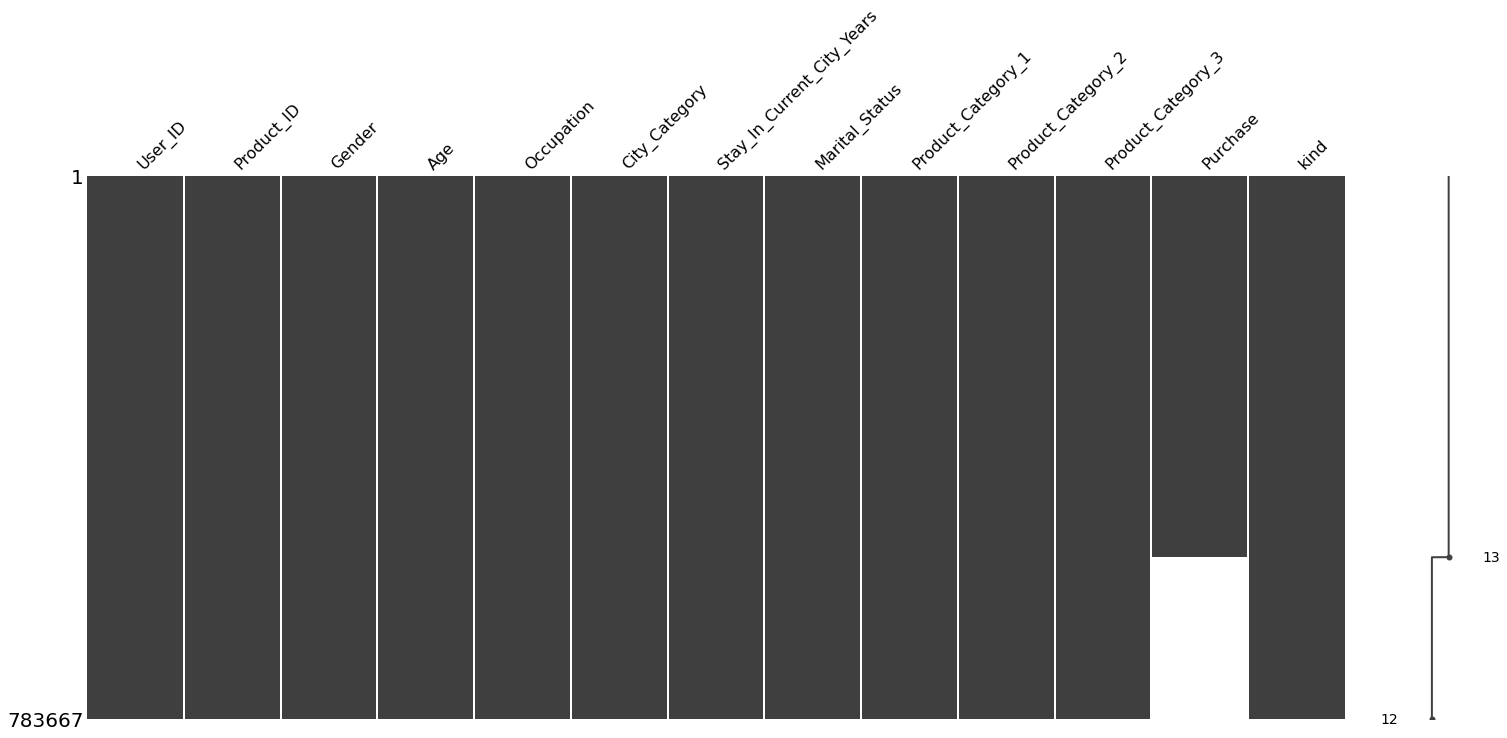

In [20]:
#combine and visualize the missing values
msno.matrix(combine);

In [21]:
#bring back the test and train from the combine just for EDA
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

<h2>3. EDA</h2>
let's try to see the relation between the labels and the target

<h3> Univarite Analysis Categorical</h3>
The data count in all variables, this will show the total variation among thee data set cleaarly seeing the categorical data set in a graphical (Barchart view)

In [22]:
cat = ['Gender','City_Category','Marital_Status','Occupation','Product_Category_1','Product_Category_2','Product_Category_3']
numerical = ['Purchase','User_ID']

In [23]:
def Explore_Cat_Data( data, var_group):
    '''
    This function is aimed to count the number of unique values in a group of categorical variable 
    '''
    
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    for j,i in enumerate(var_group):
        count = data[i].value_counts()
        u_count = data[i].nunique()
        mode = data[i].mode()
        
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
       
        x=norm_count
        y=norm_count.index
        plt.subplot(1,size,j+1)
        sns.barplot(x=x, y=y, order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {}% '.format(n_uni,norm_count*100))
        
        print(i)
        a = len(count)
        #for i in range(0,a):
            #print ('the number of unique in {} is {}'.format((count[:a].index[i]),(count[:a].values[i])))


        

Gender
City_Category
Marital_Status
Occupation
Product_Category_1
Product_Category_2
Product_Category_3


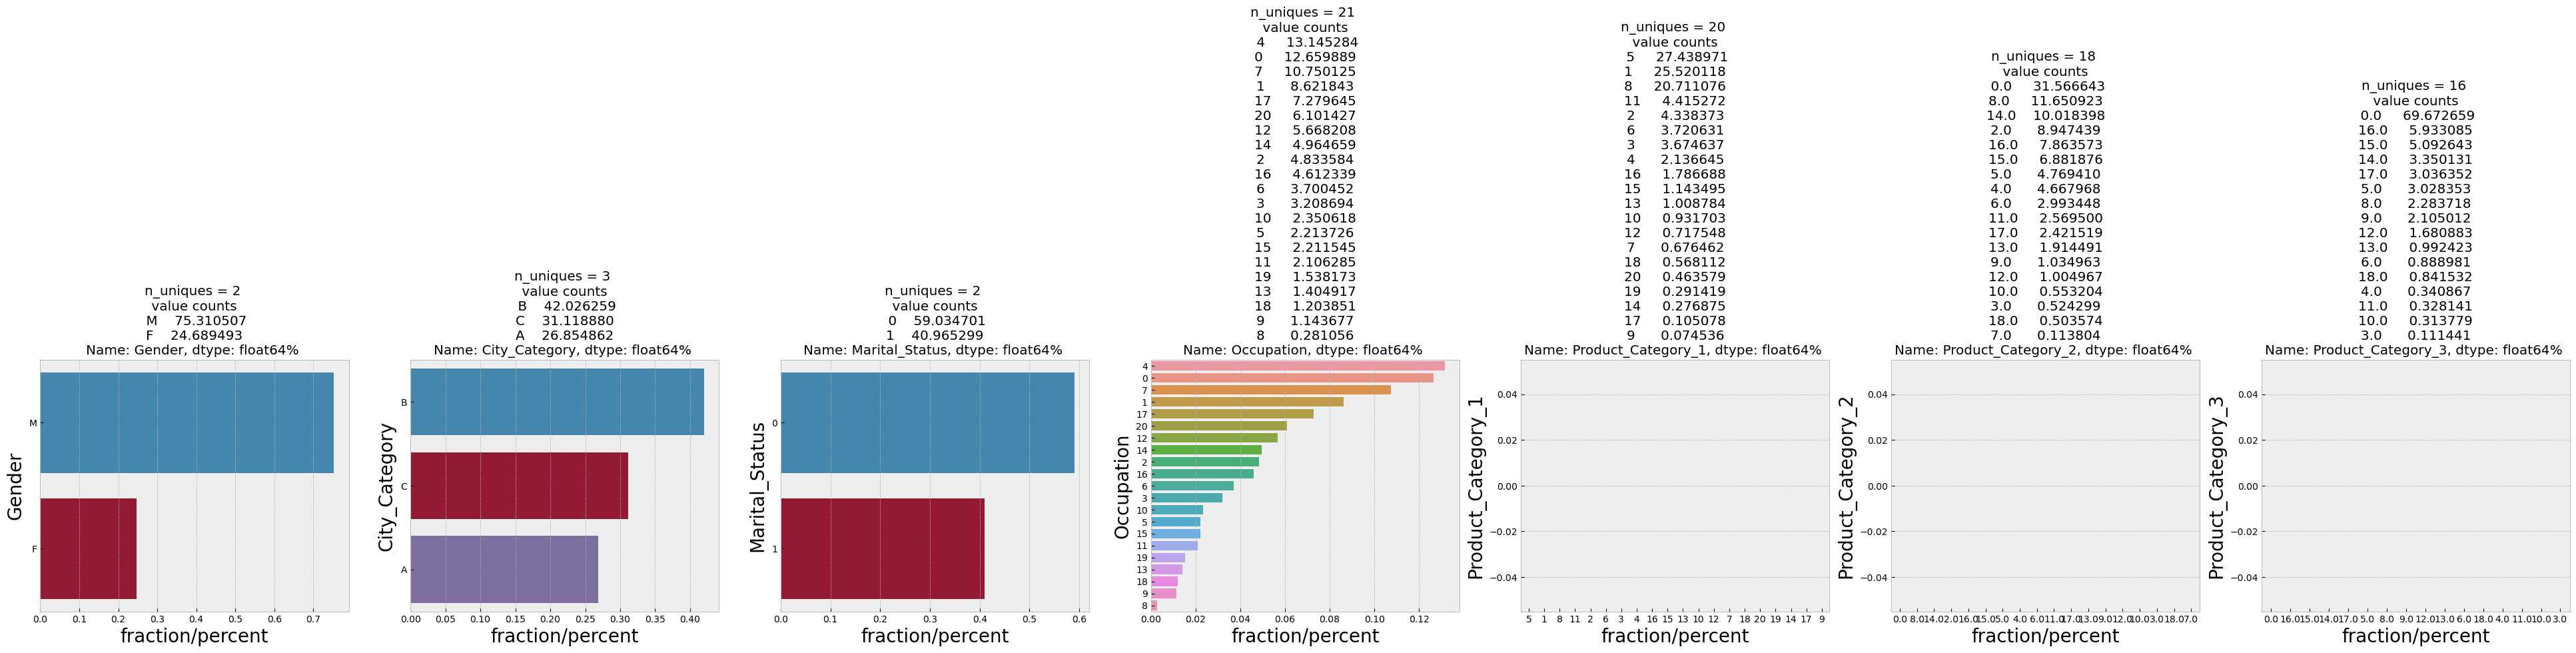

In [24]:
Explore_Cat_Data(train,cat)

### Summary
* **Gender**
    * The unique value is 2 
    * Males 75%
    * Females 25%
* **City Category**
    * From the data Stay in city category 
    * i) A - 27%
    * ii) B - 42%
    * iii) C - 31%
* **Marital Status** 
    * There are two unique marital status
    * Single 59%  
    * Married 40%
* **Prouduct Category 1-3**
    * Best selling in category 1 is 5
    * Best selling in category 2 is 8
    * Best selling in category 3 is 16

### Categorical variable Count
You can also view the categorical variables count. 

In [25]:
#make the prediction and target column 
target = 'Purchase'
cat_col = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
           'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

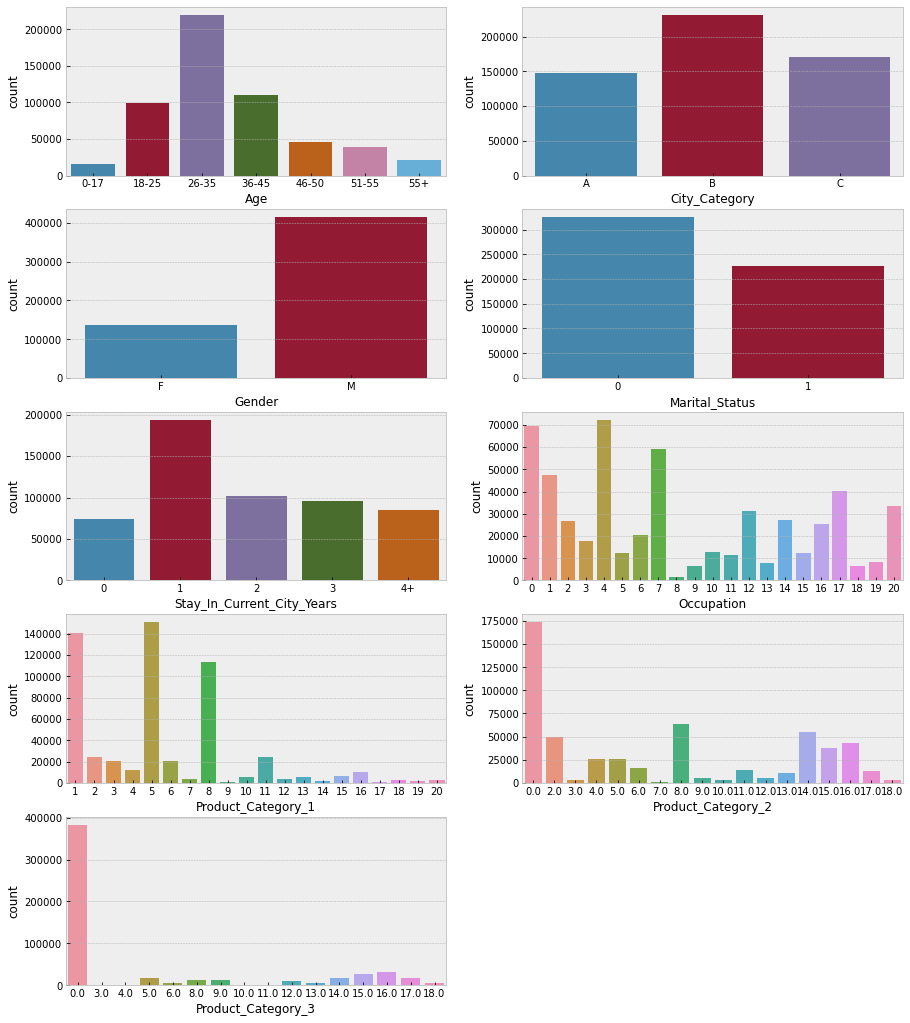

In [26]:
#Visualize the data in a barchart
fig, ax = plt.subplots(5,2, figsize=(15,18))
ax.flat[-1].set_visible(False) # to remove last plot
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, data=train)
    plt.xlabel(col)

In [27]:
prod_df = train[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
a = (prod_df.groupby('Product_Category_1', as_index =True).agg({"Purchase":"sum"}).round(2)).sum() 
b = (prod_df.groupby('Product_Category_2', as_index =True).agg({"Purchase":"sum"}).round(2)).sum()
c = (prod_df.groupby('Product_Category_3', as_index =True).agg({"Purchase":"sum"}).round(2)).sum()


In [28]:
a, b, c

(Purchase    5.095813e+09
 dtype: float64,
 Purchase    5.095813e+09
 dtype: float64,
 Purchase    5.095813e+09
 dtype: float64)

### Summary
* **Product category**
    * Product 1 sell more products 
* **City category** 
    * Only people in the city within one year buy more  why?\
* **Men**
    * Shop more in this store
* **main shoppers** 
    * are within 25- 36 years

<h3>Ploting Unique product by age group and Age group distribution.</h3>
The plot show us the comparation between age group per unique product sold and the age group distribution on the data set. 

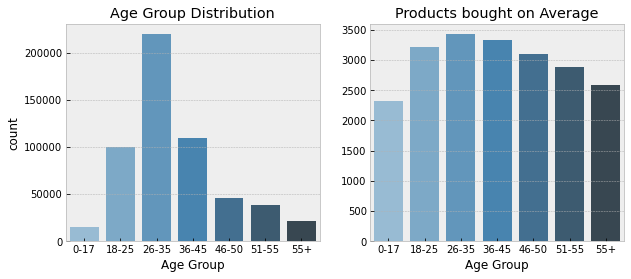

In [29]:
#visualize how age is distributed
prod_byage = train.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax = ax.ravel()

sns.countplot(train['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Products bought on Average')

plt.show()

<h3>Occupation Distribution  </h3>

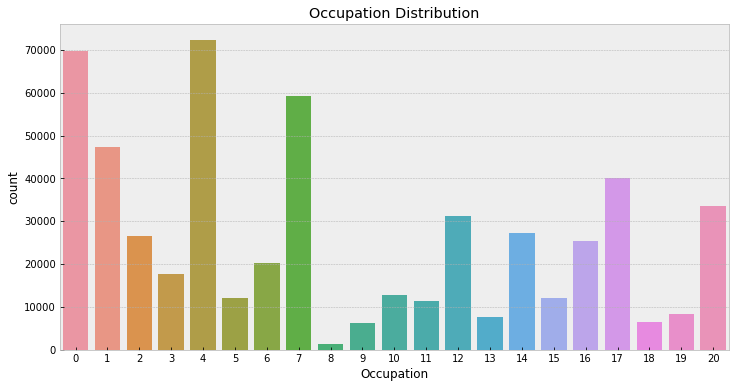

In [30]:
#view occupied Distribution
plt.figure(figsize=(12,6))
sns.countplot(train['Occupation'])
plt.title('Occupation Distribution')
plt.show()

### Summary


* *Age* Group
    * The biggest Age group is 25-35 with over 250,000 persons
    * The Age group 18-25, 26-35, 36-35 purchase large variety of products.
    * The age geoup 55+ and 0-17 have less product range 


### Univariate Numerical

In [31]:
# custom function for easy and efficient analysis of numerical univariate

def Explore_numeric_Data(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

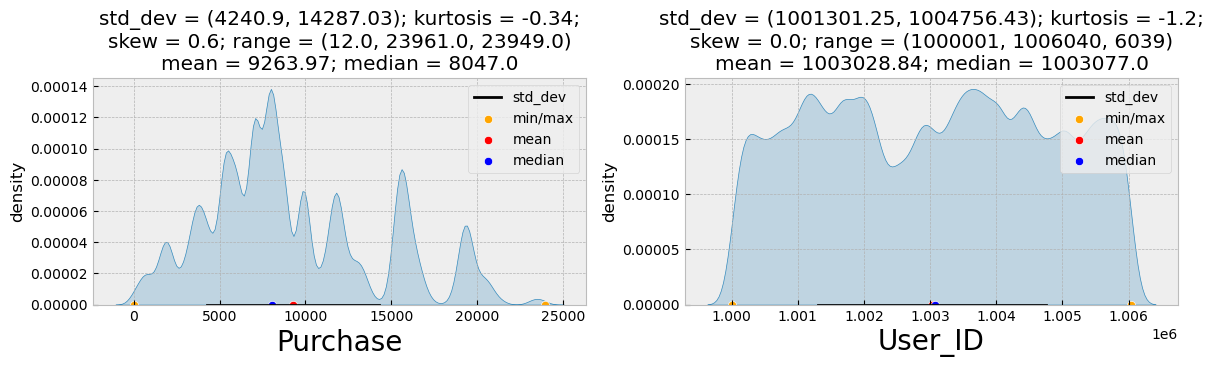

In [32]:
Explore_numeric_Data(train,numerical)

### Summary
* **Purchae**
    *    **Most customers purchase between USD4240.9 to USD14287.03**
    *    skewness 0.6 : Purchase is **negligibly biased towards lower purchased**
    *    **kurtosis = -0.34**; very less likely to have extreme/outlier values.
* **User_ID** 
    * variable is **unique for every customer, Hence uniform** distribution.
    * This variable **does not contribute any information**
    * Can be eliminated from data

### MultiVariate Analysis on  Numerical - Categorical

<h3>Ploting categories by purchase made.</h3>
This shows the Gender categories per purchase made in different city category. A clear view of what happens in different city distribution. the male in city category C. shows a little lead, follow by the Males in city category B. This means that our result will have some significant be impact.


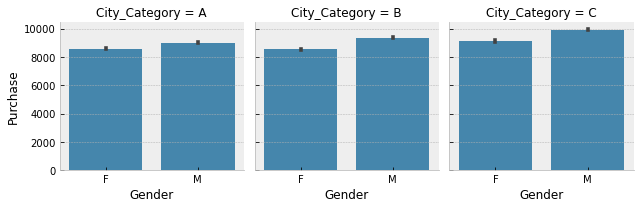

In [33]:
#gender distribution for different categories
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

### Summary
* **City category**
    * In A: The difference between the male and female isn't much
    * In B: The difference is quite significant Male bought more
    * In C: There id significant differnce Also, Male bought the highest

<h3>Purchase against stay in city category.</h3>
This clearly hows the distribution of purchases, according to marital status by their cities. 

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

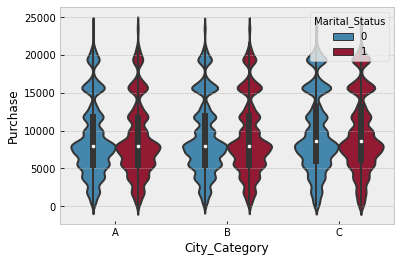

In [34]:
#violine chart for marital status on different city category
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status', data=train)

<h3>Box Plot of Purchases according to their ages.</h3>
The box plot show the purchases by age group. There are outliers ofcourse it can be seen clearly. 

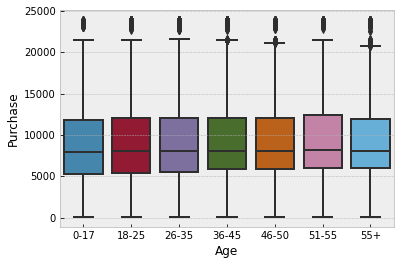

In [35]:
#box plot to view outliers
sns.boxplot('Age','Purchase', data = train)
plt.show()

### Summary
* **Age**
    * Lot of missing values visible

<h3>Next dive deep into the product categories to find the categories purchase per sub category</h3>

In [36]:
def find_category(Cat):
    SubCategory = []
    mean_purchase = []

    for i in train[Cat].unique():
        SubCategory.append(i)
    SubCategory.sort()

    for e in SubCategory:
        mean_purchase.append(train[train[Cat]==e]['Purchase'].mean())

    plt.figure(figsize=(10,5))

    sns.barplot(x=SubCategory,y=mean_purchase)
    plt.title('Mean of the Purchases per SubCategory')

    plt.xlabel(Cat, rotation=0)
    plt.ylabel('Mean Purchase')
    plt.show()

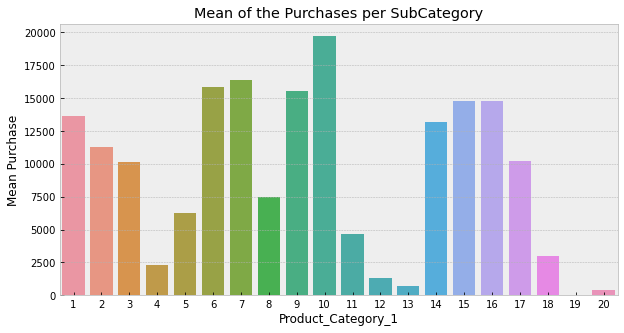

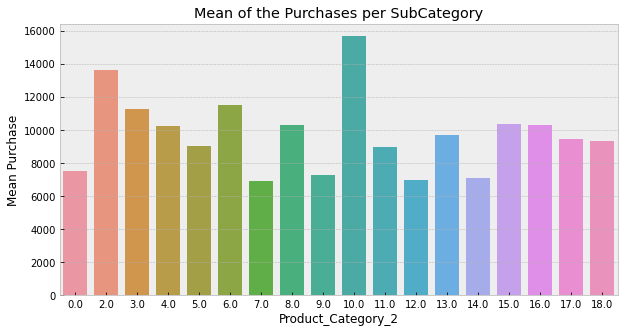

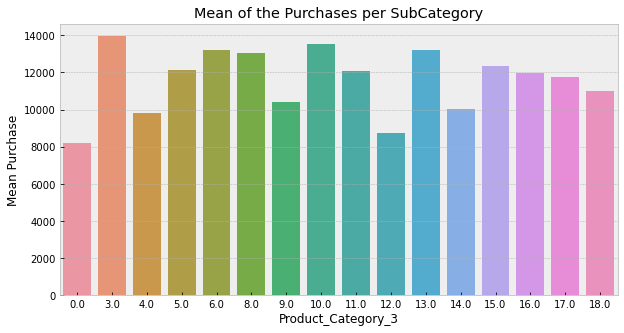

In [37]:
find_category('Product_Category_1') 
find_category('Product_Category_2')
find_category('Product_Category_3')

### Summary
* **Mean Purchase**
  * **Product Category 1**
    - On Average Product 10 peformed better
    - On Average the worst seller is Product 19
  * **Product Category 2**
    - On Average Product 10 peformed better
    - On Average the worst sellers include 7,12 and 14   
  * **Product Category 3**
    - On Average Product 3 peformed better
    - On Average the worst seller is product 12

### MultiVariate Analysis on  Categorical - Categorical

<h3>Marital status against the stay in city.</h3>


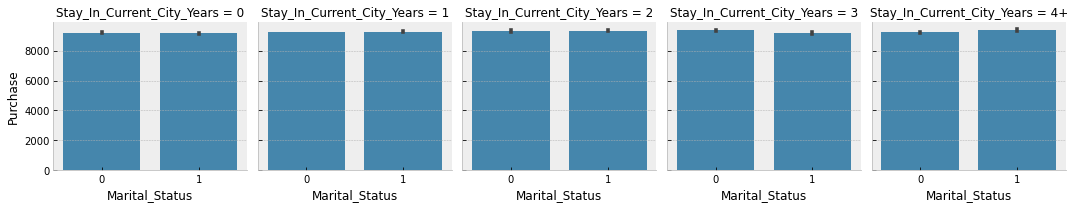

In [38]:
#marrital status for amount of years stayes in city
g = sns.FacetGrid(train,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

<h3>Correlation heat map between the variables  </h3>
This is used to view the correlation between the continous variables. Most of which are non corrolated to each other, the product categories show the most sign of corellation.

<AxesSubplot:>

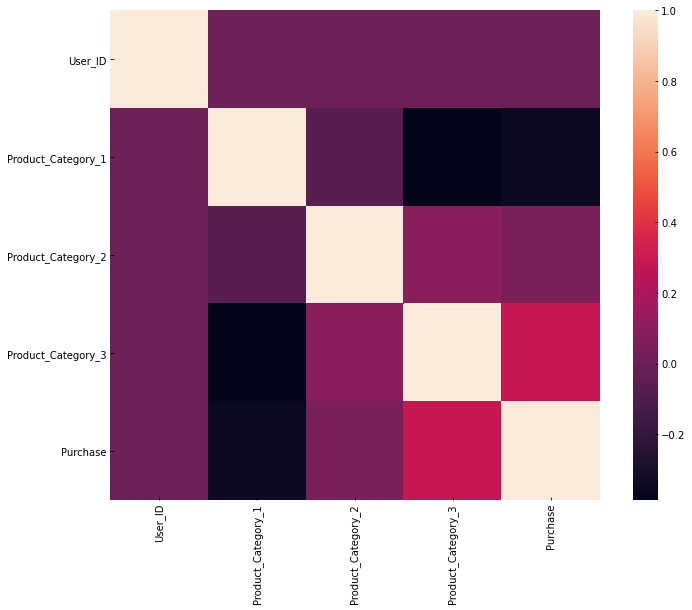

In [39]:
#Check the corrolation of the train data
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=1.0, square=True)

### Summary
* **Correlation**
-The related data just include the product category. \
The others have little or no correlation

<h2>Feature Engineering</h2>

The Age category, Gender, stay category and the city category are classified accordingly

In [40]:
#Create a new category integer for age and city
age_cat = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
combine['Age'] = combine['Age'].map(age_cat)

stay_age = {'0':0, '1':1, '2':2, '3':3, '4+':4}
combine['Stay_In_Current_City_Years'] = combine['Stay_In_Current_City_Years'].map(stay_age)

city_cat = {'A':1, 'B':2, 'C':3}
combine['City_Category'] = combine['City_Category'].map(city_cat)

gender_cat = {'M':0, 'F':1}
combine['Gender'] = combine['Gender'].map(gender_cat)

In [41]:
#view the type of data in each column
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     783667 non-null  int64   
 1   Product_ID                  783667 non-null  object  
 2   Gender                      783667 non-null  category
 3   Age                         783667 non-null  category
 4   Occupation                  783667 non-null  category
 5   City_Category               783667 non-null  category
 6   Stay_In_Current_City_Years  783667 non-null  category
 7   Marital_Status              783667 non-null  category
 8   Product_Category_1          783667 non-null  int64   
 9   Product_Category_2          783667 non-null  float64 
 10  Product_Category_3          783667 non-null  float64 
 11  Purchase                    550068 non-null  float64 
 12  kind                        783667 non-null  object  
dtyp

<h3>Create some more variable </h3>

<h4>Price</h4>
Although this price isn't given, it is clear it has impact on the prediction. The price is gotten from the minimum purchase value of a particular Product_ID. 

In [42]:
prod_prices = combine.groupby('Product_ID').min()['Purchase'].to_dict()
prod_qty= combine.groupby('Product_ID').max()['Purchase']/combine.groupby('Product_ID').min()['Purchase']

In [43]:
# Find price and qty from the minimun of price of all category
def find_qty(row):
    prod = row['Product_ID']
    return prod_qty[prod]

def find_price(row):
    prod = row['Product_ID']
    return prod_prices[prod]
combine['qty'] = combine.apply(find_qty,axis=1)
combine['Price'] = combine.apply(find_price,axis=1)


In [44]:
combine[['Price','qty']] = combine[['Price','qty']].fillna(value = 0)
combine['qty'].max(),combine['qty'].min()

(5.2, 0.0)

<h3>Bachelor/Spintser</h3>
This variable is derived form the single marital status at a particular age group. 

In [45]:
combine['Bachelor']=((combine.Age == 2) & (combine.Marital_Status == 0) & (combine.Gender == 1)).astype(int)
combine['Spintser']=((combine.Age == 2) & (combine.Marital_Status == 0) & (combine.Gender == 0)).astype(int)

<h3>Dependent/working/retired </h3>
This variable is derived form the age and marital status at a age group 1, 2-5 and 6. 

In [46]:
combine['Dependent']=((combine.Age == 0)).astype(int)
combine['Employed']=((combine.Age == 2) | (combine.Age == 3) | (combine.Age == 4) | (combine.Age == 5)).astype(int)
combine['Working']=((combine.Age == 2) | (combine.Age == 3) | (combine.Age == 4) | (combine.Age == 5) & ((combine.Occupation != 10)|(combine.Occupation != 16))).astype(int)
combine['Retired']= ((combine.Age == 6) ).astype(int)

### Using Missing Values
Here i will just add two columns to specify the row that got missing value, so 1 if the row is missing and 0 if not
and i will use them as a features

In [47]:
#create misisng value column to identify which have misisng values
#using backfill method for the missing values 

combine['miss_1'] = [1 if x!=x else 0 for x in combine['Product_Category_1']]
combine['miss_2'] = [1 if x!=x else 0 for x in combine['Product_Category_2']]
combine['miss_3'] = [1 if x!=x else 0 for x in combine['Product_Category_3']]
combine['promo'] =  [1 if x!=x else 0 for x in combine['Price']]

In [48]:
#bring back the test and train from the combine just for EDA
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

In [49]:
#group the data by customer name, creat new columns Order date, the 
rfmTable = train.groupby('User_ID').agg({'User_ID': lambda x: x.count(), # Frequency
                                        'Purchase': lambda x: x.sum(),      # Lifetime value
                                        'Price': lambda x: x.mean(),      #Average price bought
                                        'qty': lambda x: x.mean()}) #qty
rfmTable.columns = ['Frequency','Money_Value','Mean_Price','qty']

### Determine the quatiles 

In [50]:
#set the quatile values 
quant = rfmTable.quantile(q=[0.25,0.5,0.75])

We can use the above to score the quantile 0 is worst and x is best 

To keep things simple, better we name these scores:

* 1: High Value 
* 2: low value
* 3: Mid Value
* 4: verylow Value

In [51]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


In [52]:
rfmSeg = rfmTable
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quant,))
rfmSeg['MV_Quartile'] = rfmSeg['Money_Value'].apply(FMClass, args=('Money_Value',quant,))
rfmSeg['Price_Quatile'] = rfmSeg['Mean_Price'].apply(FMClass, args=('Mean_Price',quant,))
rfmSeg['qty_Quatile'] = rfmSeg['qty'].apply(FMClass, args=('Mean_Price',quant,))

#The rfm class is combination of the string values
#rfmSeg['FMClass'] = rfmSeg.F_Quartile.map(str) + rfmSeg.MV_Quartile.map(str) + rfmSeg.Price_Quatile.map(str)
rfmSeg['FMClass'] = rfmSeg.F_Quartile.map(int) + rfmSeg.MV_Quartile.map(int) + rfmSeg.Price_Quatile.map(int)
rfmSeg=rfmSeg.reset_index()

In [53]:
combine['Segment'] = combine.loc[:,'User_ID'].map(rfmSeg.set_index('User_ID')['FMClass'])
combine['Frequency'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['Frequency'])
combine['Money_Value'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['Money_Value'])
combine['F_Quartile'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['F_Quartile'])
combine['MV_Quartile'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['MV_Quartile'])
combine['Price_Quatile'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['Price_Quatile'])
combine['qty_Quatile'] = combine.loc[:, 'User_ID'].map(rfmSeg.set_index('User_ID')['qty_Quatile'])

In [54]:
combine['Class'] = '1'
combine.loc[combine['Segment']>3,'Class'] = '2' 
combine.loc[combine['Segment']>5,'Class'] = '3' 
combine.loc[combine['Segment']>7,'Class'] = '4' 
combine.loc[combine['Segment']>10,'Class'] = '5' 

In [55]:
#Make new features by findng the mean of Price and purchase with respect to the User chasteristics (Age, Occupation,City, Gender)
def slice(df, slice_by, on_df1,on_df2):
    new_df = 'df_' + str(slice_by)
    new_df =df.groupby(slice_by)[on_df1,on_df2].mean().reset_index().round(2)
    new_df.columns = [slice_by,on_df1,on_df2]
    return new_df
df_age = slice(train, 'Age','Price','Purchase')
df_occ = slice(train, 'Occupation','Price','Purchase')
df_city = slice(train,'City_Category','Price','Purchase')
df_gender= slice(train,'Gender','Price','Purchase')

combine['Age_price']= combine.loc[:, 'Age'].map(df_age.set_index('Age')['Price'])
combine['Age_Purchase']= combine.loc[:, 'Age'].map(df_age.set_index('Age')['Purchase'])
combine['Occ_Price']= combine.loc[:, 'Occupation'].map(df_occ.set_index('Occupation')['Price'])
combine['Occ_Purchase']= combine.loc[:, 'Occupation'].map(df_occ.set_index('Occupation')['Purchase'])
combine['City_Price']= combine.loc[:, 'City_Category'].map(df_city.set_index('City_Category')['Price'])
combine['City_Purchase']= combine.loc[:, 'City_Category'].map(df_city.set_index('City_Category')['Purchase'])
combine['Gender_Price']= combine.loc[:, 'Gender'].map(df_gender.set_index('Gender')['Price'])
combine['Gender_Purchase']= combine.loc[:, 'Gender'].map(df_gender.set_index('Gender')['Purchase'])



In [56]:
#Make new df fot Age, Purchase, Occupation and City category
def slice(df, slice_by, on_df1,on_df2,on_df_3):
    new_df = 'df_' + str(slice_by)
    new_df =df.groupby(slice_by)[on_df1,on_df2,on_df_3].mean().reset_index().round(2)
    new_df.columns = [slice_by,on_df1,on_df2,on_df_3]
    return new_df
df_age_Cat = slice(train, 'Age','Product_Category_1','Product_Category_2','Product_Category_3')
df_Occ_cat = slice(train, 'Occupation','Product_Category_1','Product_Category_2','Product_Category_3')
df_City_cat = slice(train, 'City_Category','Product_Category_1','Product_Category_2','Product_Category_3')
df_Gender_cat = slice(train, 'Gender','Product_Category_1','Product_Category_2','Product_Category_3')
df_Price_cat = slice(train, 'Price','Product_Category_1','Product_Category_2','Product_Category_3')


combine['Age_cat_Prod1']= combine.loc[:,'Age'].map(df_age_Cat.set_index('Age')['Product_Category_1'])
combine['Age_cat_Prod2']= combine.loc[:,'Age'].map(df_age_Cat.set_index('Age')['Product_Category_2'])
combine['Age_cat_Prod3']= combine.loc[:,'Age'].map(df_age_Cat.set_index('Age')['Product_Category_3'])
combine['Occ_cat_Prod1']= combine.loc[:, 'Occupation'].map(df_Occ_cat.set_index('Occupation')['Product_Category_1'])
combine['Occ_cat_Prod2']= combine.loc[:, 'Occupation'].map(df_Occ_cat.set_index('Occupation')['Product_Category_2'])
combine['Occ_cat_Prod3']= combine.loc[:, 'Occupation'].map(df_Occ_cat.set_index('Occupation')['Product_Category_3'])
combine['City_cat_Prod1']= combine.loc[:, 'City_Category'].map(df_City_cat.set_index('City_Category')['Product_Category_1'])
combine['City_cat_Prod2']= combine.loc[:, 'City_Category'].map(df_City_cat.set_index('City_Category')['Product_Category_2'])
combine['City_cat_Prod3']= combine.loc[:, 'City_Category'].map(df_City_cat.set_index('City_Category')['Product_Category_3'])
combine['Gender_Prod1']= combine.loc[:, 'Gender'].map(df_Gender_cat.set_index('Gender')['Product_Category_1'])
combine['Gender_Prod2']= combine.loc[:, 'Gender'].map(df_Gender_cat.set_index('Gender')['Product_Category_2'])
combine['Gender_Prod3']= combine.loc[:, 'Gender'].map(df_Gender_cat.set_index('Gender')['Product_Category_3'])
combine['Price_Prod1']= combine.loc[:, 'Price'].map(df_Price_cat.set_index('Price')['Product_Category_1'])
combine['Price_Prod2']= combine.loc[:, 'Price'].map(df_Price_cat.set_index('Price')['Product_Category_2'])
combine['Price_Prod3']= combine.loc[:, 'Price'].map(df_Price_cat.set_index('Price')['Product_Category_3'])


In [57]:
#Make new df fot product ID and UserID
def slice(df, slice_by, on_df1,on_df2,on_df_3):
    new_df = 'df_' + str(slice_by)
    new_df =df.groupby(slice_by)[on_df1,on_df2,on_df_3].mean().reset_index().round(2)
    new_df.columns = [slice_by,on_df1,on_df2,on_df_3]
    return new_df
df_prod_id = slice(train, 'Product_ID','Product_Category_1','Product_Category_2','Product_Category_3')
df_user_id = slice(train, 'User_ID','Product_Category_1','Product_Category_2','Product_Category_3')

combine['Prod_id_Prod1']= combine.loc[:,'Product_ID'].map(df_prod_id.set_index('Product_ID')['Product_Category_1'])
combine['Prod_id_Prod2']= combine.loc[:,'Product_ID'].map(df_prod_id.set_index('Product_ID')['Product_Category_2'])
combine['Prod_id_Prod3']= combine.loc[:,'Product_ID'].map(df_prod_id.set_index('Product_ID')['Product_Category_3'])
combine['User_id_Prod1']= combine.loc[:,'User_ID'].map(df_user_id.set_index('User_ID')['Product_Category_1'])
combine['User_id_Prod2']= combine.loc[:,'User_ID'].map(df_user_id.set_index('User_ID')['Product_Category_2'])
combine['User_id_Prod3']= combine.loc[:,'User_ID'].map(df_user_id.set_index('User_ID')['Product_Category_3'])

In [58]:
combine.isnull().sum()
#Replace the Nan price value with zero 
combine[['Price','Price_Prod1','Price_Prod2','Price_Prod3']]  =combine[['Price','Price_Prod1','Price_Prod2','Price_Prod3']].fillna(value =0)
combine[['Prod_id_Prod1','Prod_id_Prod2','Prod_id_Prod3']] =combine[['Prod_id_Prod1','Prod_id_Prod2','Prod_id_Prod3']].fillna(value =0)
combine.isnull().sum()

User_ID          0
Product_ID       0
Gender           0
Age              0
Occupation       0
                ..
Prod_id_Prod2    0
Prod_id_Prod3    0
User_id_Prod1    0
User_id_Prod2    0
User_id_Prod3    0
Length: 62, dtype: int64

<h3>View the missing data</h3>
View the data one more time to make sure all is in order. 

In [59]:
combine['User_ID'] = combine['User_ID'] - 1000000
combine['Product_ID'] = combine['Product_ID'].apply(lambda x:  ('P00'+ x))
combine['Product_ID'] = combine['Product_ID'].str.replace('P00', '')


<h3> Separate the data</h3>

In [60]:
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

train.drop(['kind'], axis=1, inplace=True)
test.drop(['kind','Purchase'], axis=1, inplace=True)

In [61]:
#save for parameter tunning
train.to_csv('ftrain.csv', encoding='utf-8', index=False)
test.to_csv('ftest.csv', encoding='utf-8', index=False)

In [62]:
#view the type of data in each column
((train.isnull().sum()/train.shape[0])*100).sort_values(ascending = False)

User_ID          0.0
Class            0.0
Age_Purchase     0.0
Occ_Price        0.0
Occ_Purchase     0.0
                ... 
Frequency        0.0
Money_Value      0.0
F_Quartile       0.0
MV_Quartile      0.0
User_id_Prod3    0.0
Length: 61, dtype: float64

As seen from the figure above the only misisng data is the purchase that will be predicted. the data is cleaned and ready to be modelled.
We seperate the data once more then we are ready to creat our model. 

In [63]:
#remove totally and view
train.dropna(subset=['Price'],inplace=True)
train.isnull().sum()

User_ID          0
Product_ID       0
Gender           0
Age              0
Occupation       0
                ..
Prod_id_Prod2    0
Prod_id_Prod3    0
User_id_Prod1    0
User_id_Prod2    0
User_id_Prod3    0
Length: 61, dtype: int64

<h2>4.MODELLING</h2>

In [64]:
#Dividing the data into test and train datasets
#drop purchase 
target = ['Purchase']
features = train.columns.drop(target)


In [65]:

#scaler = StandardScaler()

#train[features] = scaler.fit_transform(train[features])


X = train[features].values
Y = train[target].values
# Create the bins.  My `y` variable has
# 550068 observations, and I want 50 bins.

bins = np.linspace(0, 550050, 5)

# Save your Y values in a new numpy array,
# broken down by the bins created above.
x_bin = np.digitize(X[:,11], bins)

# Pass y_binned to the stratify argument,
# and sklearn will handle the rest

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=x_bin)

In [66]:
#model = RandomForestRegressor()
# fit the model
#model.fit(X, Y)
# get importance
#importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))


In [67]:
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

<h3> Assigning the variables </h3>
Next we will assign the functions to variables to be called later

<h3> train the model and do the fitting </h3>
Here we fit training data to Random Forest Regressor to the training data set. THe models below represent all the models used. 

In [68]:
#Base models 
lr    = LinearRegression()
dtr   = DecisionTreeRegressor()
rfr   = RandomForestRegressor()
gbr   = GradientBoostingRegressor()
xgb_r = xgb.XGBRegressor()

fit1 = lr.fit(X_train,Y_train)    #Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,Y_train)   #Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,Y_train)   #Here we fit training data to Random forest Regressor
fit4 = gbr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
fit5 = xgb_r.fit(X_train, Y_train)#Here we fit training data to XGBoosting Regressor

<h2> Print the Accuracy score for Baseline Model </h2>

In [69]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,Y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,Y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,Y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,Y_test)*100)
print("Accuracy Score of XGBoost on testset",fit5.score(X_test,Y_test)*100)

Accuracy Score of Linear regression on test set 64.45865283293102
Accuracy Score of Decision Tree on test set 47.83080359278586
Accuracy Score of Random Forests on test set 74.02228584947508
Accuracy Score of Gradient Boosting on testset 69.79124079741865
Accuracy Score of XGBoost on testset 75.49096691765662


<h2> RMSE Score for all models </h2>

In [70]:
#Linear Regression RMSE
PredLR = fit1.predict(X_test)
rmseLr = np.sqrt(mean_squared_error(PredLR,Y_test,))
#Decision Tree
PredDt = fit2.predict(X_test)
rmseDt = np.sqrt(mean_squared_error(PredDt,Y_test,))
#Random Forests
PredRF = fit3.predict(X_test)
rmseRf = np.sqrt(mean_squared_error(PredRF,Y_test,))
#Gradient bosting
predBxt = fit4.predict(X_test)
rmseGb  = np.sqrt(mean_squared_error(predBxt,Y_test))
#XG bosting
predXg = fit5.predict(X_test)
rmseXg   = np.sqrt(mean_squared_error(predXg,Y_test))

In [71]:
print(' The RMSE Score for {} model is {}'.format(('PredLR'),(rmseLr)))
print(' The RMSE Score for {} model is {}'.format(('PredDt'),(rmseDt)))
print(' The RMSE Score for {} model is {}'.format(('PredRF'),(rmseRf)))
print(' The RMSE Score for {} model is {}'.format(('PredBxt'),(rmseGb)))
print(' The RMSE Score for {} model is {}'.format(('PredXg'),(rmseXg)))

 The RMSE Score for PredLR model is 3003.193008191756
 The RMSE Score for PredDt model is 3638.5083426273477
 The RMSE Score for PredRF model is 2567.5373401332404
 The RMSE Score for PredBxt model is 2768.7436350880744
 The RMSE Score for PredXg model is 2493.9020402371566


## Esemble Model
We will choose the best three models


In [72]:
#Fit the best three models the get the score 
m3_score= fit3.score(X_test,Y_test)
m4_score= fit4.score(X_test,Y_test)
m5_score= fit5.score(X_test,Y_test)

In [73]:
index_ = [1,2,3,]
valid_r2 = [m3_score,m4_score,m5_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.740223
2,0.697912
3,0.754910


In [74]:
#Sort the values by the score then give it a rank
#get the weight of each prediction 
sorted_rank = rank_eval.sort_values('score')
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.697912,1,0.166667
1,0.740223,2,0.333333
3,0.754910,3,0.500000


In [75]:
#Use the weight to make predictions then sum it to get the exact prediction
wt_pred3 = PredRF*float(sorted_rank.loc[[1],['weight']].values)
wt_pred4 = predBxt*float(sorted_rank.loc[[2],['weight']].values)
wt_pred5 = predXg*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = wt_pred3 + wt_pred4 + wt_pred5
ranked_prediction

array([13456.74959341,  8561.84433311,  5282.96902625, ...,
       10204.77990408, 15448.79634231,  6569.67327159])

In [76]:
from sklearn.metrics import r2_score
r2_score(Y_test, ranked_prediction)
rmsees = np.sqrt(mean_squared_error(ranked_prediction,Y_test))
rmsees

2502.000252894209

<H2>5.MODEL SELECTION AND PREDICTION</H2>
    We choose the XGBoosting Modelbecause it has the lowest RMSE. the next task is to optimise the model using it unique parameters. 

<H3>Try eXtreem Gradient Boosting</H3>
First the convertion of the data into data matrix.

In [77]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

Then the split the data set to get the training and the testing data in a ration of 80% to 20%
Create the XGBoost parameters in the function, focusing on the learning rate, maximum dept and min child weight, then colsample tree.

In [78]:
#Make sure the data is distributed in the most important predictor by using the stratify 
bins = np.linspace(0, 550050, 5)
x_bin = np.digitize(X[:,11], bins)

X_trainX, X_testX, y_trainX, y_testX = train_test_split(X, Y, test_size=0.2, random_state=42, stratify =x_bin)

In [79]:
#Use the derived parameters for Xgboost model
xg_reg = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=1)
#fit the  the model
FitXG = xg_reg.fit(X_trainX,y_trainX)
predXg = FitXG.predict(X_testX)
#perform accuracy score for the predictions
print("Accuracy Score of XGBoost on testset",FitXG.score(X_testX,y_testX)*100)
#Validate the model using the rootmeansquared method 
rmse = np.sqrt(mean_squared_error(y_testX, predXg))
print("RMSE: %f" % (rmse))

Accuracy Score of XGBoost on testset 74.59792377252772
RMSE: 2538.931062


In [80]:
#Use the derived parameters for Gboosting model
gbr = GradientBoostingRegressor(learning_rate=1.0, min_samples_split=500,max_depth=50,n_estimators= 25, subsample=0.8,random_state = 20)
FitGB= gbr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
predGb = FitGB.predict(X_testX)
#perform accuracy score for the predictions
print("Accuracy Score of GBoost on testset",FitGB.score(X_testX,y_testX)*100)

Accuracy Score of GBoost on testset 62.89721059567726


In [81]:
#Use the derived parameters for random forest model
rfr   = RandomForestRegressor( min_samples_split=500,max_depth=50,n_estimators= 30,random_state = 20)
FitRF= rfr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
predRF = FitRF.predict(X_testX)
print("Accuracy Score of RF on testset",FitRF.score(X_testX,y_testX)*100)

Accuracy Score of RF on testset 72.65855430758856


## Essemble model on Tunned Parms
After parameters tunning the best parameters are essmebles together to get a better prediction. 

In [82]:
#Fit the new models 
m6_score = FitRF.score(X_testX,y_testX)
m7_score = FitGB.score(X_testX,y_testX)
m8_score = FitXG.score(X_testX,y_testX)

index_ = [1,2,3]
valid_r2 = [m6_score,m7_score,m8_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.726586
2,0.628972
3,0.745979


In [83]:
#Sort the values by the score then give it a rank
#get the weight of each prediction 
sorted_rank = rank_eval.sort_values('score')
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.628972,1,0.166667
1,0.726586,2,0.333333
3,0.745979,3,0.500000


In [84]:
#Use the weight to make predictions then sum it to get the exact prediction
wt_pred6 = predGb*float(sorted_rank.loc[[1],['weight']].values)
wt_pred7 = predRF*float(sorted_rank.loc[[2],['weight']].values)
wt_pred8 = predXg*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = wt_pred6 + wt_pred7 + wt_pred8


In [85]:
#find the score and the rmse 
r2_score(y_testX, ranked_prediction)
rmsees = np.sqrt(mean_squared_error(ranked_prediction,y_testX))
rmsees

2530.489815413899

<h3>Apply the model on test </h3>
Next is to apply the model to our test data, to get our predictions. 

In [86]:
features = test.columns
#test[features] = scaler.fit_transform(test[features])
XT=test[features].values

In [87]:
##Fit three model on the test data 
predGbX = FitGB.predict(XT)
predXgX = FitXG.predict(XT)
predRFX = FitRF.predict(XT)

<h4>Essemble the Models then Copy the results to the submission file showing </h4>
Predicted Purchase, User_Id and Product_ID

In [88]:
#Use the weight to make predictions then sum it to get the exact prediction
wt_pred1X = predGbX*float(sorted_rank.loc[[2],['weight']].values)
wt_pred2X = predRFX*float(sorted_rank.loc[[1],['weight']].values)
wt_pred3X = predXgX*float(sorted_rank.loc[[3],['weight']].values)

#sum the ranked prediction then load it in a dataframe Purchase
ranked_predictionX = wt_pred1X + wt_pred2X + wt_pred3X
predXgTE=pd.DataFrame(ranked_predictionX, columns=['Purchase']) 
TrainPE = pd.concat([test.reset_index(),predXgTE], axis=1)
TrainPE['User_ID'] = TrainPE['User_ID'] + 1000000

#create a new data frame for submission 
TrainPE['Product_ID'] = TrainPE['Product_ID'].apply(lambda x:  ('P00'+ x))
SubmissionE = TrainPE[['Purchase','User_ID','Product_ID']]
SubmissionE.to_csv('submissionEX.csv', encoding='utf-8', index=False)


<H2>5. SUMMARY</H2>
We can see some conclusions below, about the Black Friday dataset:
<ol>
<li>Men go to Black Friday more than women</li>
<li>Age group 26-35 participate in Black Friday much more than other Age group </li>
<li> The ranking of the other age groups are as follows: 36-45, 18-25, 46-50, 51-55, 55+ and 0-17</li>

<li>We can't do much conclusions here, but it is possible to realize that people with
    lows and highs occupation number go out to Black Friday more than those who was mediums occupation number</li>
<li>People who lives in City B bought much more than others.</li>
</ol>


